In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")


import warnings
warnings.filterwarnings('ignore')

# Aim of the Experiment
In this assignment, I will focus on data preprocessing, which is the preliminary step
of data mining. My aim here is to make the data ready for use by performing the
necessary data preprocessing

# Data Integrity and Description
First, the data will be checked for completeness and integrity. This will also provide an opportunity to quickly overview the data set and prepare the future steps.

In [2]:
#I read the data seperated with ";"
raw_csv_data=pd.read_csv("Dataset/data.csv", delimiter=";", decimal=",")
data=raw_csv_data.copy()
data.head(5)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [3]:
data.info() #there are 9471 rows but as you see it has 9357 nonnull rows and Unnamed:15-Unnamed:16 hasn't any nonnul value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
NULLCOUNT = data.isnull().sum(axis=1)
NULLCOUNT.sum()
#As you see there is lots off Null values. I will handle them.

20652

# Data Structure
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

# Column Description

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

#### First, I want to visiualise data before processing.

In [5]:
dfnum=data.drop(["Date"],axis=1) #For showing distributions, I dropped the string columns.

In [6]:
dfnum = dfnum.drop(["Time"],axis=1)

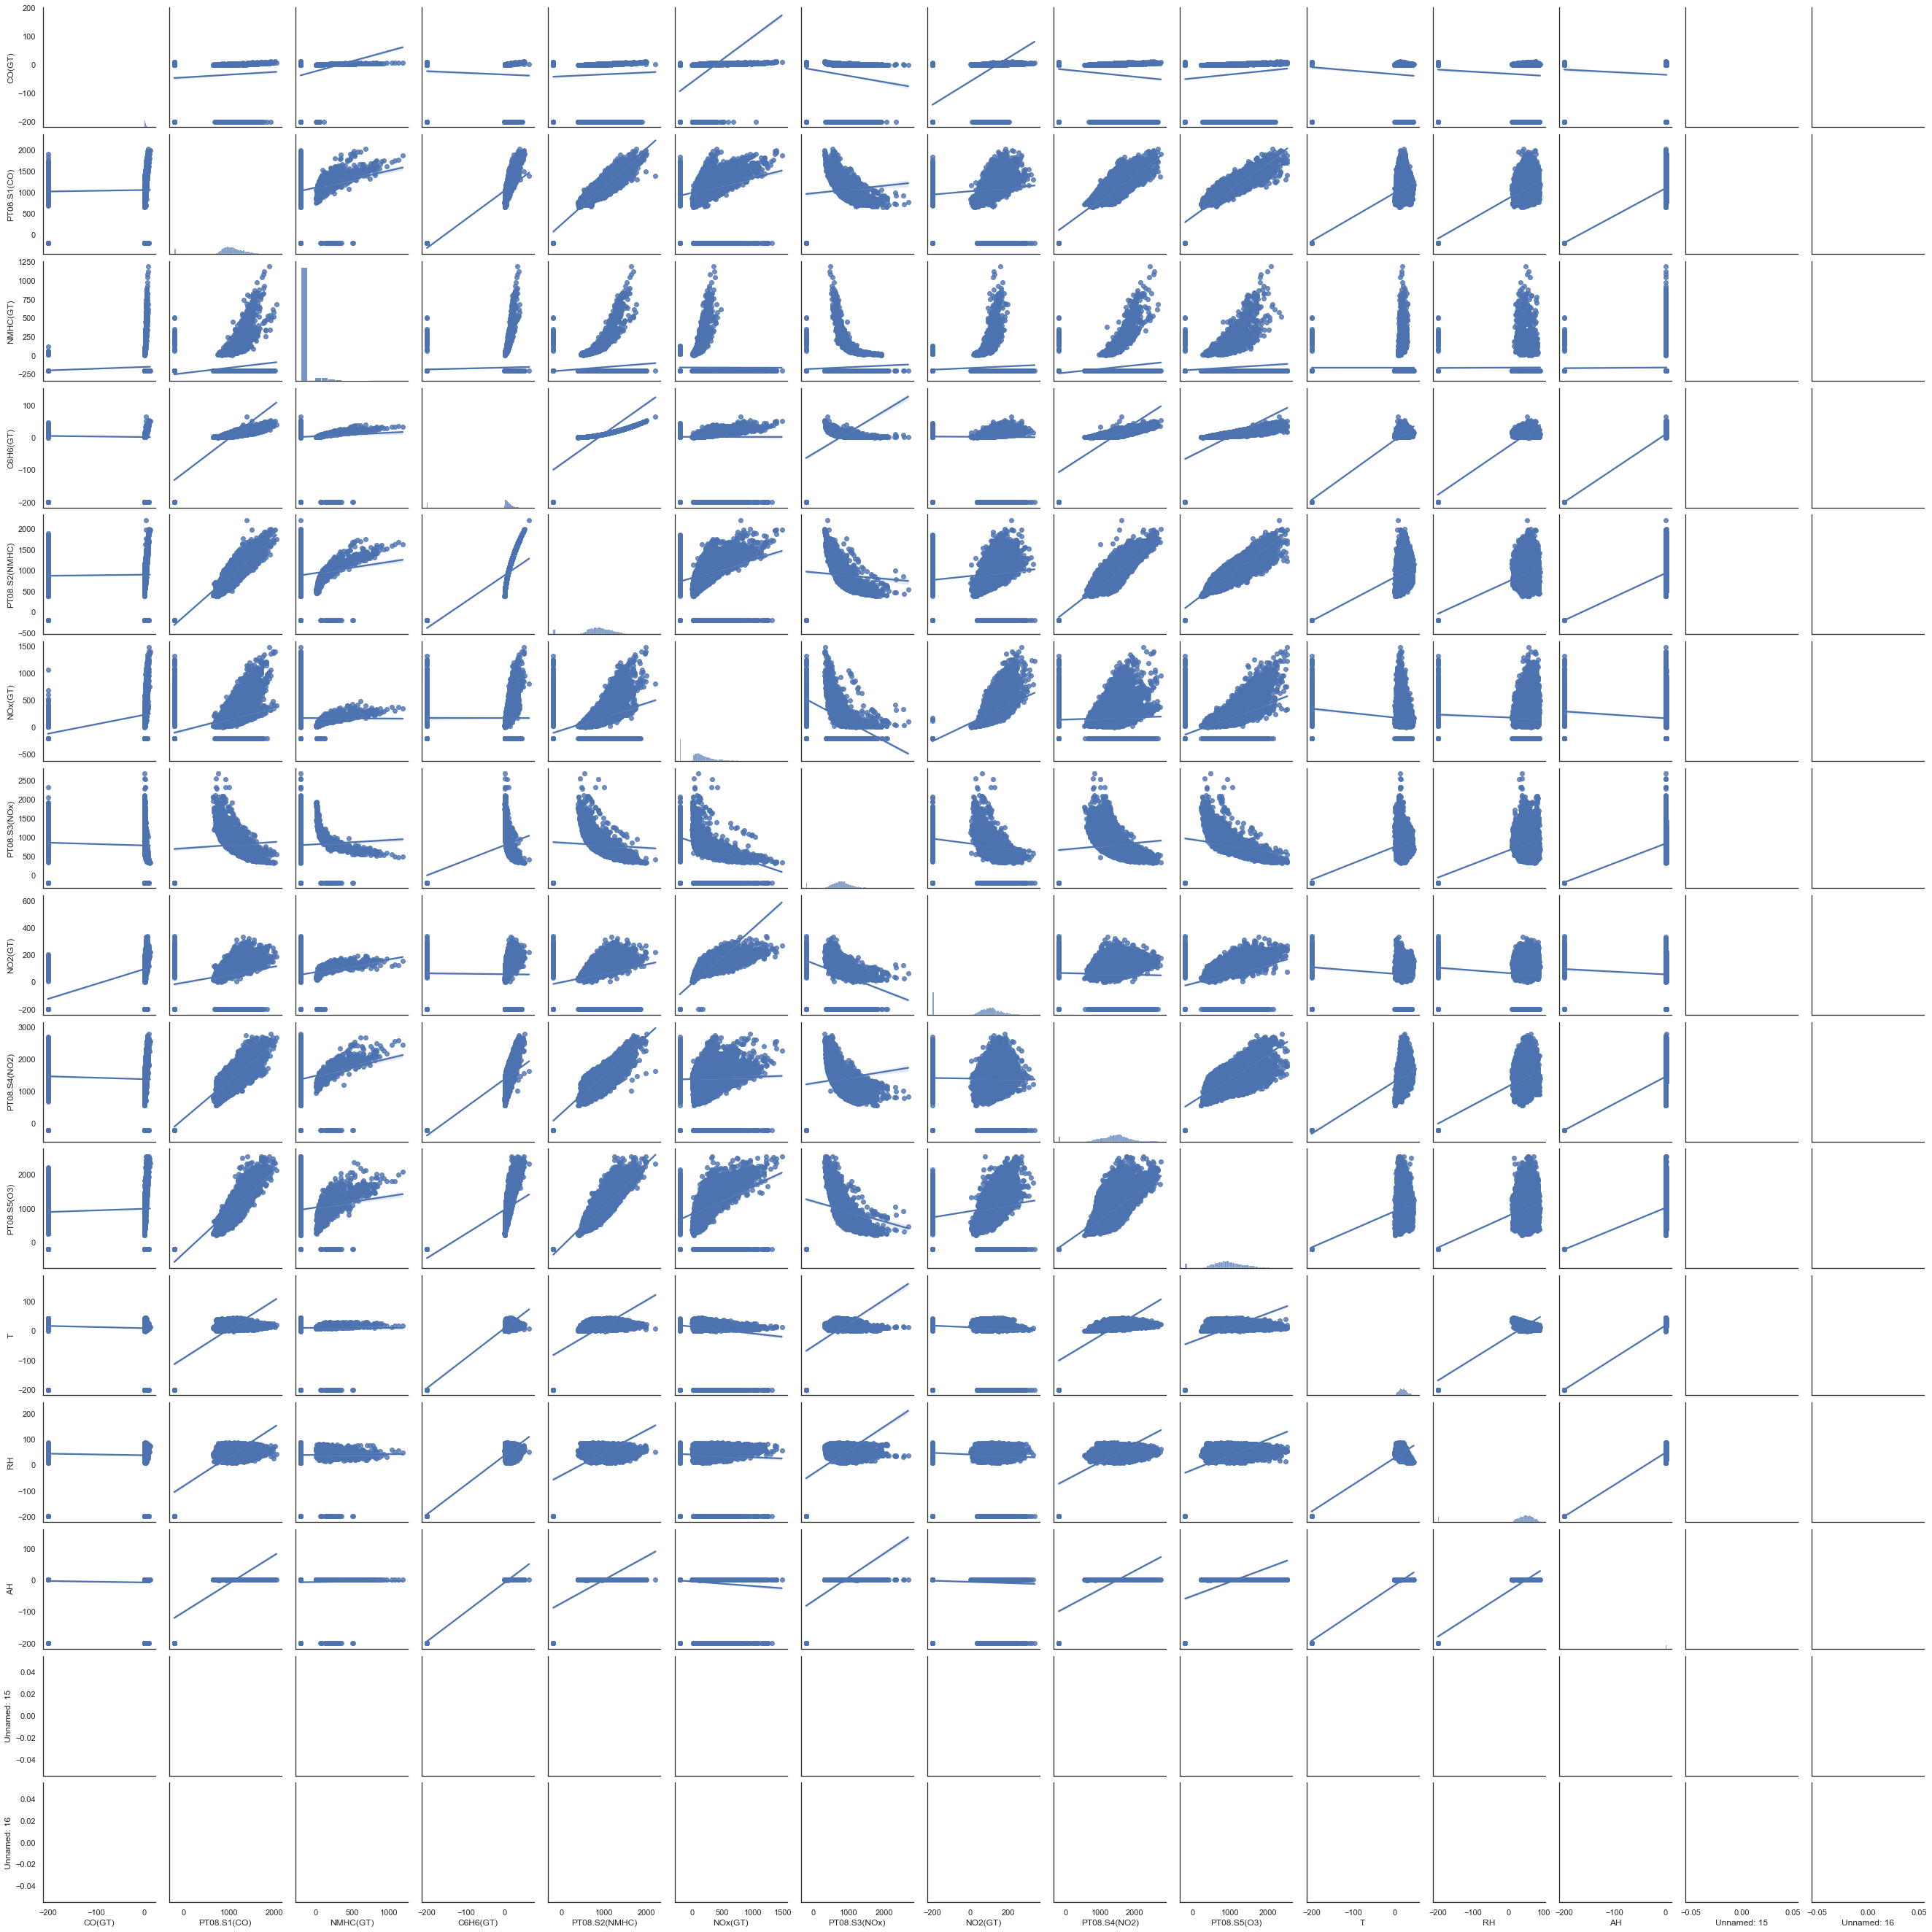

In [7]:
sns.pairplot(dfnum, kind  ="reg");

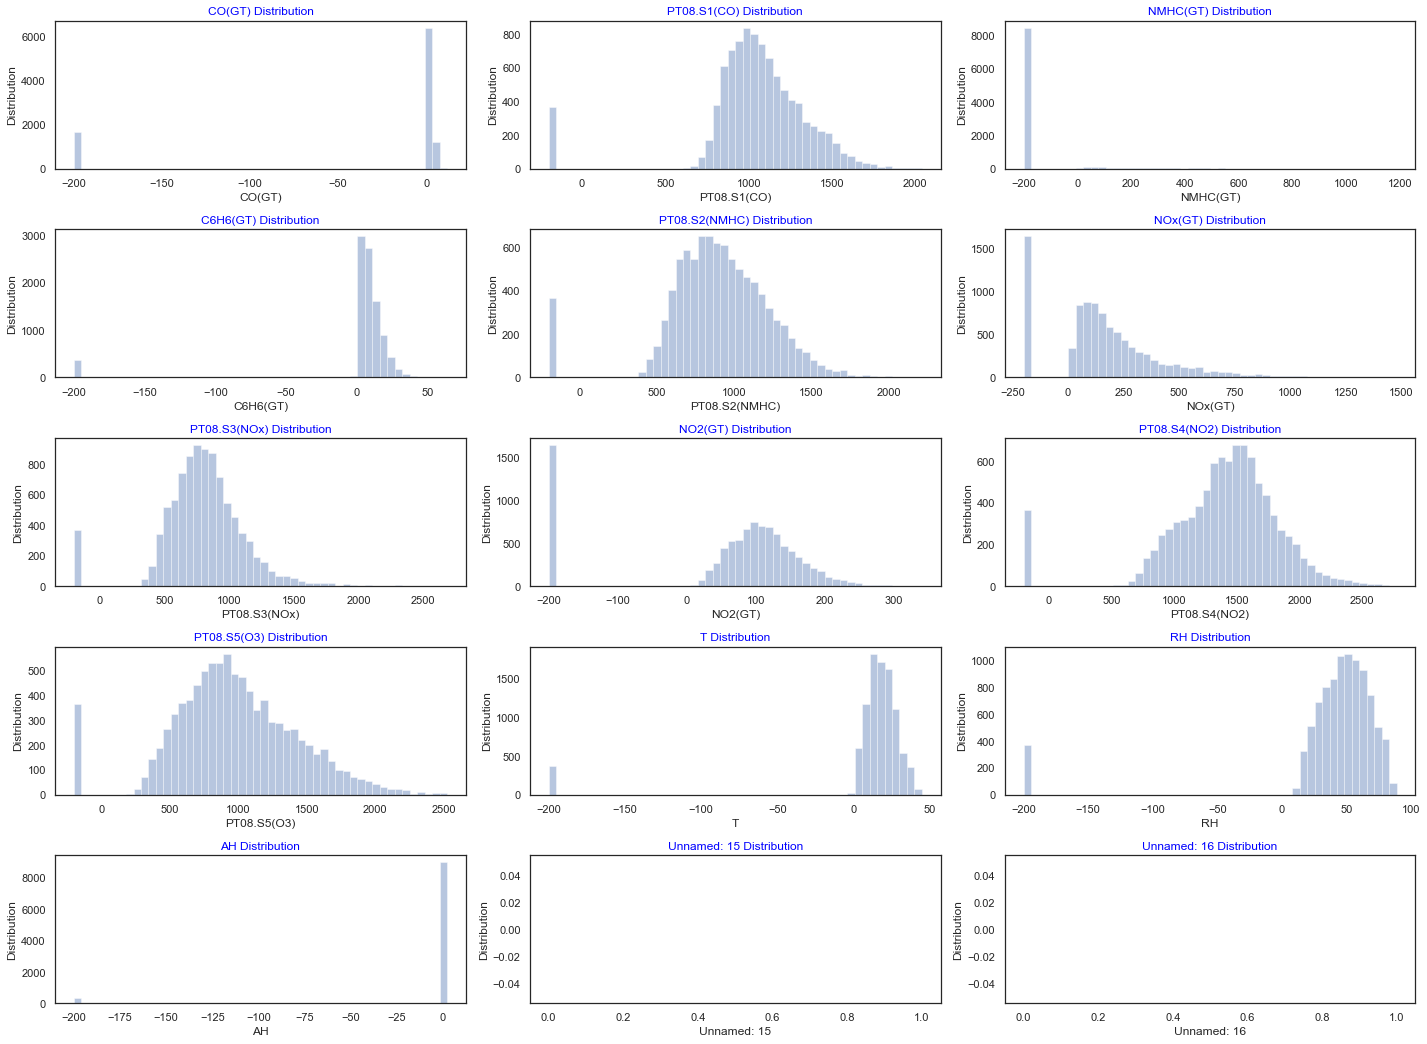

In [8]:
#I plotted the distrubition graphs
f=plt.figure(figsize=(20,20))
for i, col in enumerate(dfnum.columns):
    ax=f.add_subplot(7,3,i+1)
    sns.distplot(dfnum[col],kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

<AxesSubplot:>

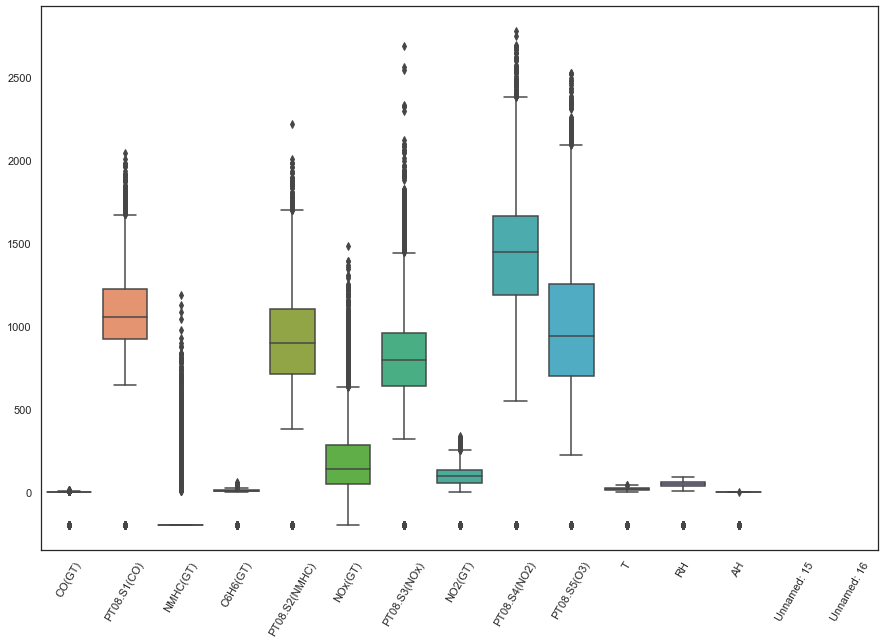

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=dfnum, ax=ax)

In [10]:
#As you see, the last 2 columns unnecessary. Also there is all-null rows and outliers.

In [11]:
data.dropna(axis=0, how="all", thresh=None, subset=None, inplace=True) #I dropped the raws that has all "null" values 

In [12]:
data.dropna(axis=1, how="all", thresh=None, subset=None, inplace=True) #I dropped the columns that has all "null" values 

In [13]:
data.info() #It is the updated version. I dropped all-null columns and rows. As you see data has 9357 entries and 9357 non-null.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


#### I will use the Inner Quartile method to detect outliers in numaric data.

<AxesSubplot:>

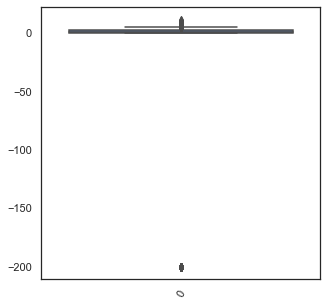

In [14]:
#I checked the Co(GT) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["CO(GT)"], ax=ax)

In [15]:
Q1 = data["CO(GT)"].quantile(0.25)
Q3 = data["CO(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0 #Measurements shouldn't bee less than 0. I choosed 0 as lower limit.
up_lim = Q3 + 1.5*IQR
outlier = ((data["CO(GT)"]<low_lim) | (data["CO(GT)"]>up_lim))

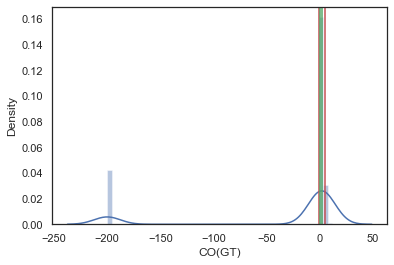

In [16]:
sns.distplot(data["CO(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [17]:
data["CO(GT)"][outlier] 

10     -200.0
25        6.9
26        6.1
34     -200.0
39     -200.0
        ...  
9121      5.7
9130   -200.0
9202   -200.0
9274   -200.0
9346   -200.0
Name: CO(GT), Length: 1898, dtype: float64

In [18]:
#As you see, the some of outliers are less than 0.  
#It means they are missreading and should be dropped. 

In [19]:
#there is too much lost data if I drop them. I want to fill -200 values first with NaN instead. I will handle it later.

In [20]:
 data["CO(GT)"][data["CO(GT)"]<0] = np.NaN #First I change the - values with NaN to ignore them.

In [21]:
Q1 = data["CO(GT)"].quantile(0.25)
Q3 = data["CO(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR
outlier = ((data["CO(GT)"]<low_lim) | (data["CO(GT)"]>up_lim))
data["CO(GT)"][outlier] #As you see when I ignore them ,outlier count reduced visibly.

25      6.9
26      6.1
50      6.6
98      5.9
111     8.1
       ... 
9073    6.2
9074    7.2
9097    5.9
9098    7.5
9121    5.7
Name: CO(GT), Length: 215, dtype: float64

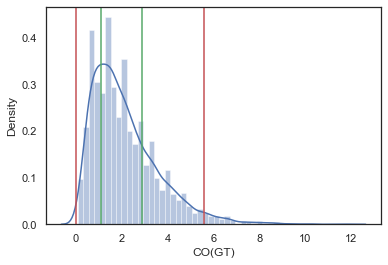

In [22]:
sns.distplot(data["CO(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()
#Here you can see the difference between before and later I ignore -200 values.

In [23]:
#I dropped the outliers
data=data.drop(data[data["CO(GT)"]<low_lim].index, inplace=False)
data=data.drop(data[data["CO(GT)"]>up_lim].index, inplace=False)

In [24]:
data["CO(GT)"].fillna(data["CO(GT)"].median(), inplace=True) #I fill the NaN values at the end with median.

In [25]:
#When the data is skewed, it is good to consider using the median value for replacing the missing values. 
#Thats why why, used median.

<AxesSubplot:>

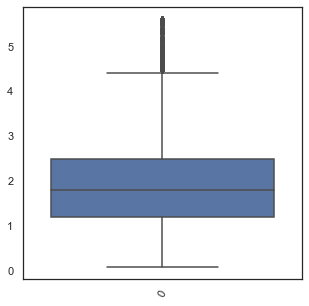

In [26]:
#updated version of CO(GT) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["CO(GT)"], ax=ax)

<AxesSubplot:>

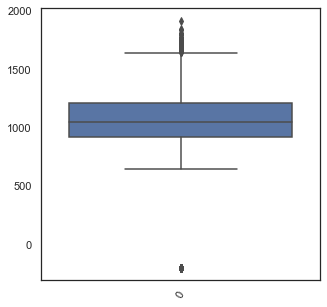

In [27]:
#I checked the PT08.S1(CO) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S1(CO)"], ax=ax)

In [28]:
Q1 = data["PT08.S1(CO)"].quantile(0.25)
Q3 = data["PT08.S1(CO)"].quantile(0.75)
IQR = Q3-Q1 
low_lim = 0
up_lim = Q3 + 1.5*IQR
outlier = ((data["PT08.S1(CO)"]<low_lim) | (data["PT08.S1(CO)"]>up_lim))
data["PT08.S1(CO)"][outlier] #Same issue here. -200 values must be deleted.The lost amount is not much to replace it.

53      1677.0
97      1808.0
110     1797.0
136     1735.0
147     1800.0
         ...  
8141    1738.0
8142    1712.0
8143    1751.0
8777    -200.0
9099    1667.0
Name: PT08.S1(CO), Length: 396, dtype: float64

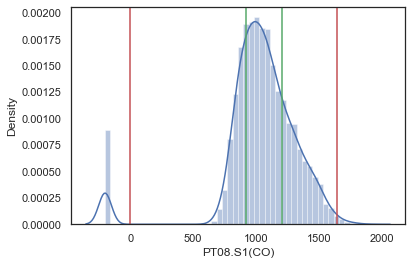

In [29]:
sns.distplot(data["PT08.S1(CO)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [30]:
#I dropped the outliers
data.drop(data[data["PT08.S1(CO)"]<low_lim].index, inplace=True)
data.drop(data[data["PT08.S1(CO)"]>up_lim].index, inplace=True)

<AxesSubplot:>

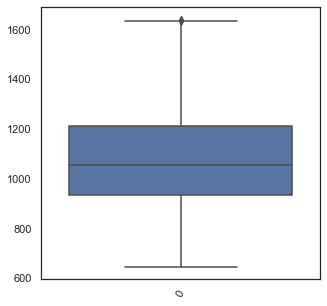

In [31]:
#updated version of PT08.S1(CO) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S1(CO)"], ax=ax)

<AxesSubplot:>

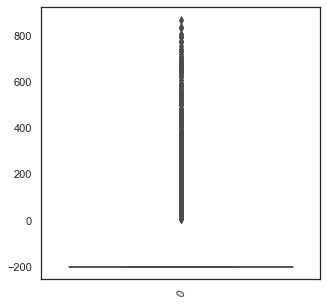

In [32]:
#I checked the NMHC(GT) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["NMHC(GT)"], ax=ax)

In [33]:
Q1 = data["NMHC(GT)"].quantile(0.25)
Q3 = data["NMHC(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR
outlier = ((data["NMHC(GT)"]<low_lim) | (data["NMHC(GT)"]>up_lim))

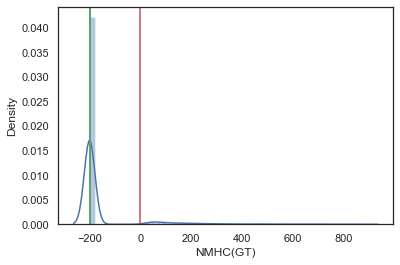

In [34]:
sns.distplot(data["NMHC(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [35]:
data["NMHC(GT)"][outlier]  #Here, when you look at the distribution table, you can see that there is "-200" values more than
#actual reading. That means the data labeled as outlier are our actual data.

0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352   -200.0
9353   -200.0
9354   -200.0
9355   -200.0
9356   -200.0
Name: NMHC(GT), Length: 8746, dtype: float64

In [36]:
up_lim

-200.0

In [37]:
IQR

0.0

In [38]:
#As you see, because of the -200 values are too much, it dominated the upper limit. Thats why, my code saw the actual 
#measurements as missreading/outlier. Thats why, I used outlier labeled data instead of dropping them.

In [39]:
data["NMHC(GT)"][data["NMHC(GT)"]<0] = np.NaN #I filled the -200 values with NaN

In [40]:
Q1 = data["NMHC(GT)"].quantile(0.25)
Q3 = data["NMHC(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR
#Recalculated outliers.

In [41]:
IQR

201.0

In [42]:
up_lim

567.5

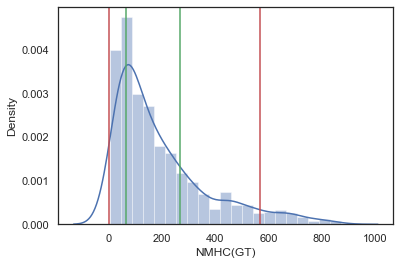

In [43]:
sns.distplot(data["NMHC(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [44]:
#I dropped the outliers
data.drop(data[data["NMHC(GT)"]<low_lim].index, inplace=True)
data.drop(data[data["NMHC(GT)"]>up_lim].index, inplace=True)

In [45]:
data["NMHC(GT)"].fillna(data["NMHC(GT)"].median(), inplace=True) #I refilled NaN values.

<AxesSubplot:>

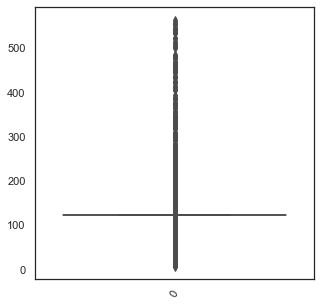

In [46]:
#Here is updated version
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["NMHC(GT)"], ax=ax)

In [47]:
#Since I filled the big amount of data with median values, median dominates the upper bound. Thats why there seems like 
#big amount of data are outliers here. But outliers doesn't always mean bad. 

<AxesSubplot:>

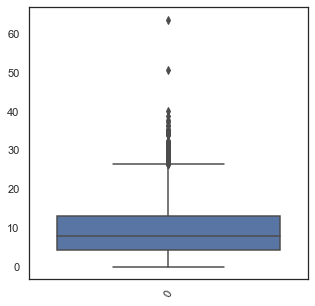

In [48]:
#I checked the C6H6(GT) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["C6H6(GT)"], ax=ax)

In [49]:
Q1 = data["C6H6(GT)"].quantile(0.25)
Q3 = data["C6H6(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR
outlier = ((data["C6H6(GT)"]<low_lim) | (data["C6H6(GT)"]>up_lim))
data["C6H6(GT)"][outlier]

168     27.0
974     29.9
997     27.0
1008    32.5
1031    27.1
        ... 
7536    27.7
7911    29.1
8177    33.9
9039    27.8
9063    27.0
Name: C6H6(GT), Length: 135, dtype: float64

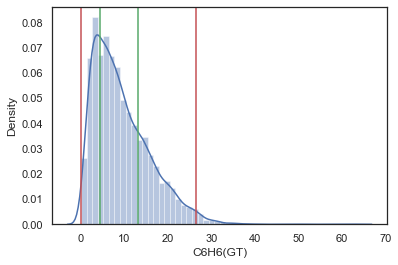

In [50]:
sns.distplot(data["C6H6(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [51]:
#I dropped the outliers
data.drop(data[data["C6H6(GT)"]<low_lim].index, inplace=True)
data.drop(data[data["C6H6(GT)"]>up_lim].index, inplace=True)

<AxesSubplot:>

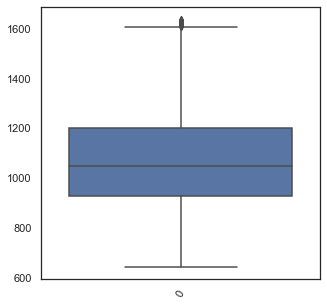

In [52]:
#updated version of PT08.S1(CO) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S1(CO)"], ax=ax)

<AxesSubplot:>

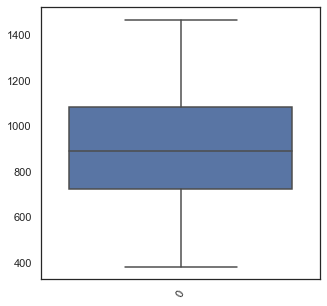

In [53]:
#I checked the PT08.S2(NMHC) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S2(NMHC)"], ax=ax)

In [54]:
Q1 = data["PT08.S2(NMHC)"].quantile(0.25)
Q3 = data["PT08.S2(NMHC)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["PT08.S2(NMHC)"]<low_lim) | (data["PT08.S2(NMHC)"]>up_lim))
data["PT08.S2(NMHC)"][outlier]

Series([], Name: PT08.S2(NMHC), dtype: float64)

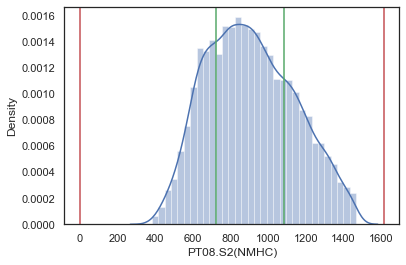

In [55]:
sns.distplot(data["PT08.S2(NMHC)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [56]:
#Here as you see, there is no outlier and "should be dropped" value. It was but I also dropped them until I get this stage.

<AxesSubplot:>

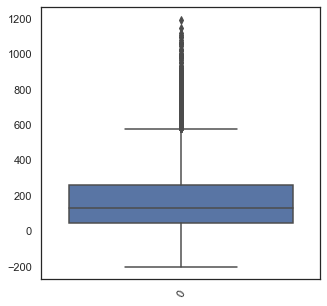

In [57]:
#I checked the NOx(GT) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["NOx(GT)"], ax=ax)

In [58]:
Q1 = data["NOx(GT)"].quantile(0.25)
Q3 = data["NOx(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["NOx(GT)"]<low_lim) | (data["NOx(GT)"]>up_lim))
data["NOx(GT)"][outlier] #There is too much outlier to be dropped. I will fill them with NaN for now and with median later on.

9      -200.0
33     -200.0
39     -200.0
57     -200.0
81     -200.0
        ...  
9206    623.0
9207    606.0
9253    673.0
9349    594.0
9350    586.0
Name: NOx(GT), Length: 1935, dtype: float64

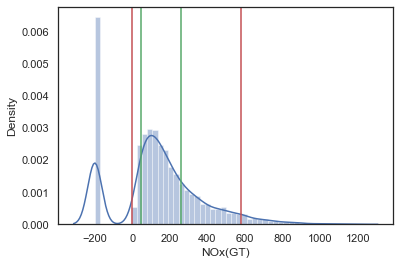

In [59]:
sns.distplot(data["NOx(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [60]:
data["NOx(GT)"][data["NOx(GT)"]<0] = np.NaN

In [61]:
Q1 = data["NOx(GT)"].quantile(0.25)
Q3 = data["NOx(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["NOx(GT)"]<low_lim) | (data["NOx(GT)"]>up_lim))
data["NOx(GT)"][outlier]
#When I ignore -200 values, there are visibly lower otliers.

4491    891.0
4549    664.0
4814    614.0
4839    641.0
4840    667.0
        ...  
9062    649.0
9089    653.0
9090    690.0
9206    623.0
9253    673.0
Name: NOx(GT), Length: 308, dtype: float64

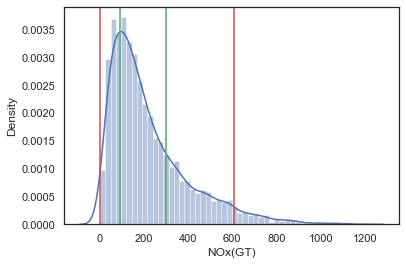

In [62]:
sns.distplot(data["NOx(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [63]:
#I dropped the outliers
data.drop(data[data["NOx(GT)"]<0].index, inplace=True)
data.drop(data[data["NOx(GT)"]>up_lim].index, inplace=True)

In [64]:
data["NOx(GT)"].fillna(data["NOx(GT)"].median(), inplace=True)

<AxesSubplot:>

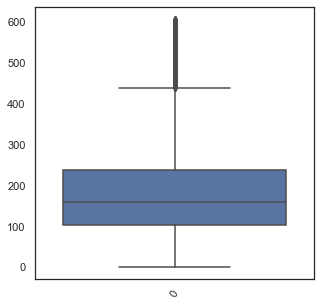

In [65]:
#updated version of NOx(GT) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["NOx(GT)"], ax=ax)

<AxesSubplot:>

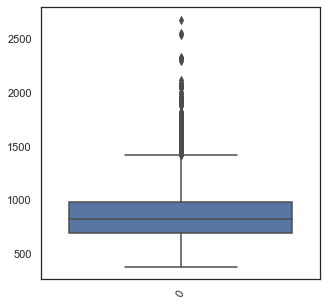

In [66]:
#I checked the PT08.S3(NOx) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S3(NOx)"], ax=ax)

In [67]:
Q1 = data["PT08.S3(NOx)"].quantile(0.25)
Q3 = data["PT08.S3(NOx)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["PT08.S3(NOx)"]<low_lim) | (data["PT08.S3(NOx)"]>up_lim))
data["PT08.S3(NOx)"][outlier]

6       1462.0
7       1453.0
8       1579.0
9       1705.0
10      1818.0
         ...  
8530    1804.0
8531    1727.0
8532    1677.0
8652    1433.0
8674    1490.0
Name: PT08.S3(NOx), Length: 250, dtype: float64

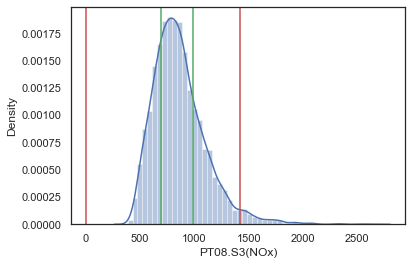

In [68]:
sns.distplot(data["PT08.S3(NOx)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [69]:
#I dropped the outliers
data.drop(data[data["PT08.S3(NOx)"]<low_lim].index, inplace=True)
data.drop(data[data["PT08.S3(NOx)"]>up_lim].index, inplace=True)

<AxesSubplot:>

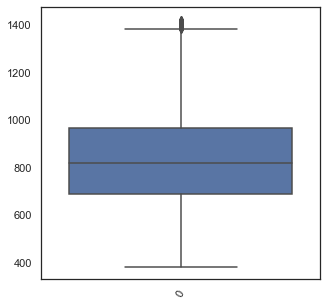

In [70]:
#updated version of PT08.S3(NOx) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S3(NOx)"], ax=ax)

<AxesSubplot:>

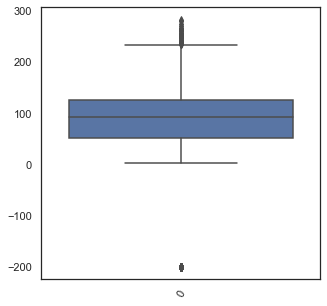

In [71]:
#I checked the NO2(GT) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["NO2(GT)"], ax=ax)

In [72]:
Q1 = data["NO2(GT)"].quantile(0.25)
Q3 = data["NO2(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["NO2(GT)"]<low_lim) | (data["NO2(GT)"]>up_lim))
data["NO2(GT)"][outlier] 

39     -200.0
57     -200.0
81     -200.0
105    -200.0
129    -200.0
        ...  
8673   -200.0
8697   -200.0
8721   -200.0
8745   -200.0
8755   -200.0
Name: NO2(GT), Length: 1519, dtype: float64

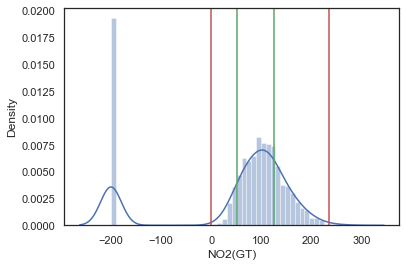

In [73]:
sns.distplot(data["NO2(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [74]:
#As you see when I drop the all outliers it will be 1519 lost data. I will fill them with median and recalculate.

In [75]:
data["NO2(GT)"][data["NO2(GT)"]<0] = np.NaN

In [76]:
Q1 = data["NO2(GT)"].quantile(0.25)
Q3 = data["NO2(GT)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["NO2(GT)"]<low_lim) | (data["NO2(GT)"]>up_lim))
data["NO2(GT)"][outlier] 

2687    226.0
2856    233.0
6072    220.0
6093    222.0
6094    221.0
        ...  
8906    223.0
8907    229.0
8950    219.0
8952    225.0
8954    223.0
Name: NO2(GT), Length: 64, dtype: float64

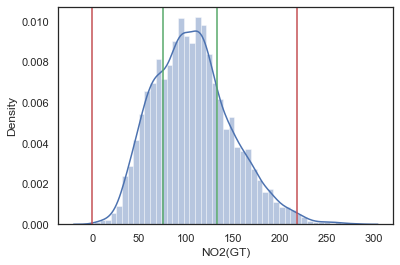

In [77]:
sns.distplot(data["NO2(GT)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [78]:
#I dropped the outliers
data.drop(data[data["NO2(GT)"]<low_lim].index, inplace=True)
data.drop(data[data["NO2(GT)"]>up_lim].index, inplace=True)

In [79]:
data["NO2(GT)"].fillna(data["NO2(GT)"].median(), inplace=True)

<AxesSubplot:>

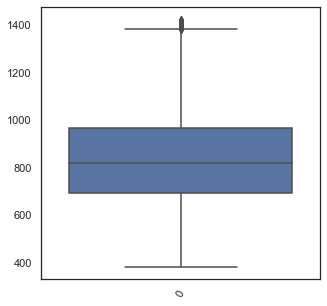

In [80]:
#updated version of PT08.S3(NOx) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S3(NOx)"], ax=ax)

<AxesSubplot:>

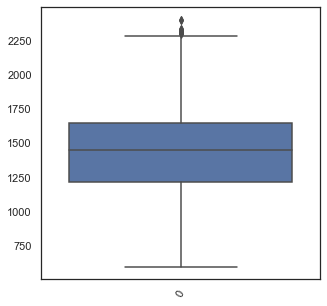

In [81]:
#I checked the PT08.S4(NO2) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S4(NO2)"], ax=ax)

In [82]:
Q1 = data["PT08.S4(NO2)"].quantile(0.25)
Q3 = data["PT08.S4(NO2)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["PT08.S4(NO2)"]<low_lim) | (data["PT08.S4(NO2)"]>up_lim))
data["PT08.S4(NO2)"][outlier]

614     2299.0
1286    2400.0
1309    2306.0
2199    2316.0
2317    2319.0
2653    2316.0
2665    2332.0
2702    2337.0
3398    2322.0
3518    2404.0
Name: PT08.S4(NO2), dtype: float64

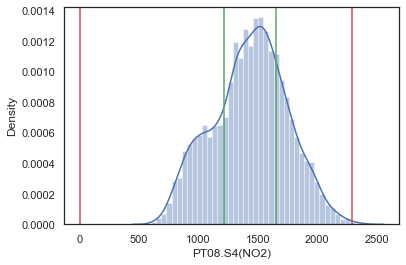

In [83]:
sns.distplot(data["PT08.S4(NO2)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [84]:
#I dropped the outliers
data.drop(data[data["PT08.S4(NO2)"]<low_lim].index, inplace=True)
data.drop(data[data["PT08.S4(NO2)"]>up_lim].index, inplace=True)

<AxesSubplot:>

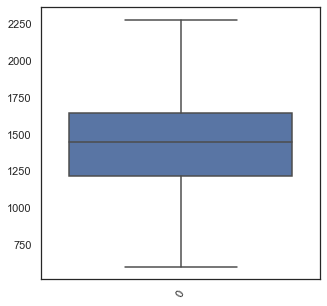

In [85]:
#updated version of PT08.S3(NOx) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S4(NO2)"], ax=ax)

<AxesSubplot:>

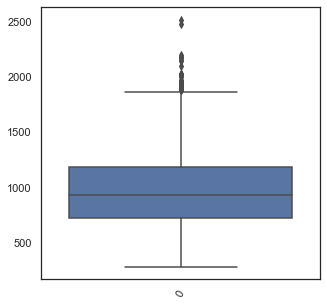

In [86]:
#I checked the PT08.S5(O3) column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S5(O3)"], ax=ax)

In [87]:
Q1 = data["PT08.S5(O3)"].quantile(0.25)
Q3 = data["PT08.S5(O3)"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["PT08.S5(O3)"]<low_lim) | (data["PT08.S5(O3)"]>up_lim))
data["PT08.S5(O3)"][outlier]

75      1886.0
2031    2202.0
2032    1947.0
2832    2475.0
2833    2021.0
2847    1902.0
2873    1886.0
3159    2028.0
4393    1894.0
4468    1935.0
4841    2178.0
4842    1901.0
5369    1916.0
5473    2185.0
5474    1959.0
5646    2150.0
5647    2519.0
5648    1925.0
6920    1967.0
6921    1960.0
6943    2030.0
6944    1913.0
6945    1901.0
6954    1898.0
6955    2100.0
6956    1896.0
6958    1893.0
6959    1972.0
6961    1906.0
7154    2004.0
7605    1947.0
7606    2171.0
7607    1920.0
8115    2141.0
8116    2023.0
8117    1967.0
8118    1931.0
8130    1911.0
8131    1943.0
8132    2020.0
9242    1890.0
Name: PT08.S5(O3), dtype: float64

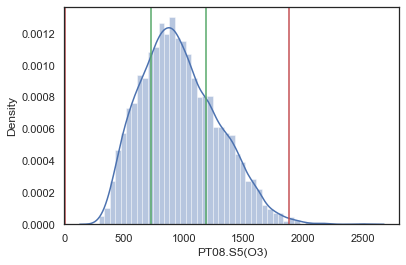

In [88]:
sns.distplot(data["PT08.S5(O3)"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [89]:
#I dropped the outliers
data.drop(data[data["PT08.S5(O3)"]<low_lim].index, inplace=True)
data.drop(data[data["PT08.S5(O3)"]>up_lim].index, inplace=True)

<AxesSubplot:>

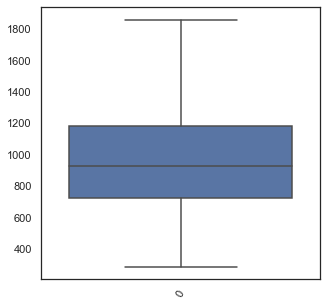

In [90]:
#updated version of PT08.S3(NOx) column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["PT08.S5(O3)"], ax=ax)

<AxesSubplot:>

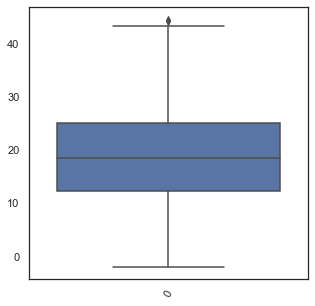

In [91]:
#I checked the T column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["T"], ax=ax)

In [92]:
Q1 = data["T"].quantile(0.25)
Q3 = data["T"].quantile(0.75)
IQR = Q3-Q1
low_lim = Q1- 1.5*IQR # I didn't make the low_lim as 0 because the temparature can be negative.
up_lim = Q3 + 1.5*IQR

outlier = ((data["T"]<low_lim) | (data["T"]>up_lim))
data["T"][outlier]

3213    44.3
3214    44.6
Name: T, dtype: float64

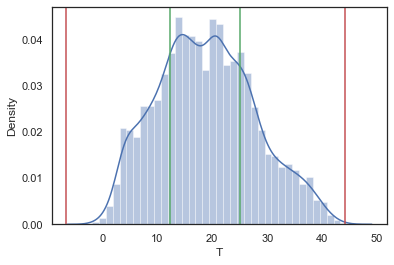

In [93]:
sns.distplot(data["T"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [94]:
#I dropped the outliers
data.drop(data[data["T"]<low_lim].index, inplace=True)
data.drop(data[data["T"]>up_lim].index, inplace=True)

<AxesSubplot:>

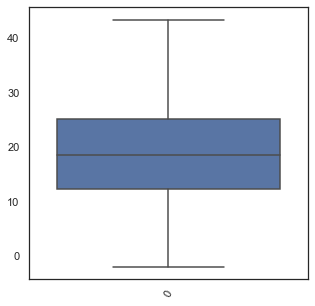

In [95]:
#updated version of T column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["T"], ax=ax)

<AxesSubplot:>

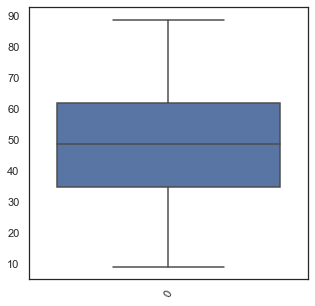

In [96]:
#I checked the RH column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["RH"], ax=ax)

In [97]:
Q1 = data["RH"].quantile(0.25)
Q3 = data["RH"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["RH"]<low_lim) | (data["RH"]>up_lim))
data["RH"][outlier]

Series([], Name: RH, dtype: float64)

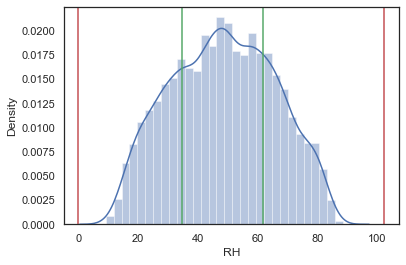

In [98]:
sns.distplot(data["RH"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [99]:
#As you see there is no outliers

<AxesSubplot:>

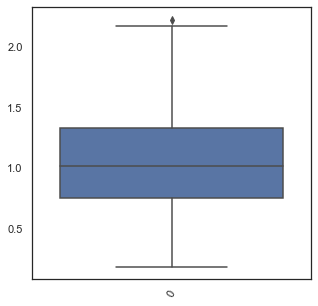

In [100]:
#I checked the AH column for outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["AH"], ax=ax)

In [101]:
Q1 = data["AH"].quantile(0.25)
Q3 = data["AH"].quantile(0.75)
IQR = Q3-Q1
low_lim = 0
up_lim = Q3 + 1.5*IQR

outlier = ((data["AH"]<low_lim) | (data["AH"]>up_lim))
data["AH"][outlier]

4462    2.231
Name: AH, dtype: float64

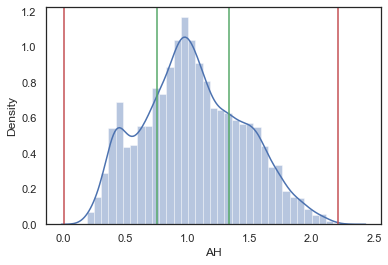

In [102]:
sns.distplot(data["AH"])
plt.axvline(up_lim, color='r')
plt.axvline(low_lim, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [103]:
#I dropped the outliers()
data.drop(data[data["AH"]<low_lim].index, inplace=True)
data.drop(data[data["AH"]>up_lim].index, inplace=True)

<AxesSubplot:>

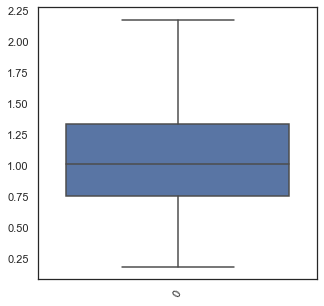

In [104]:
#updated version of AH column boxplot:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["AH"], ax=ax)


In [105]:
dfnum2=data.drop(["Date"],axis=1, inplace=False)
dfnum2 = dfnum2.drop(["Time"],axis=1, inplace=False)

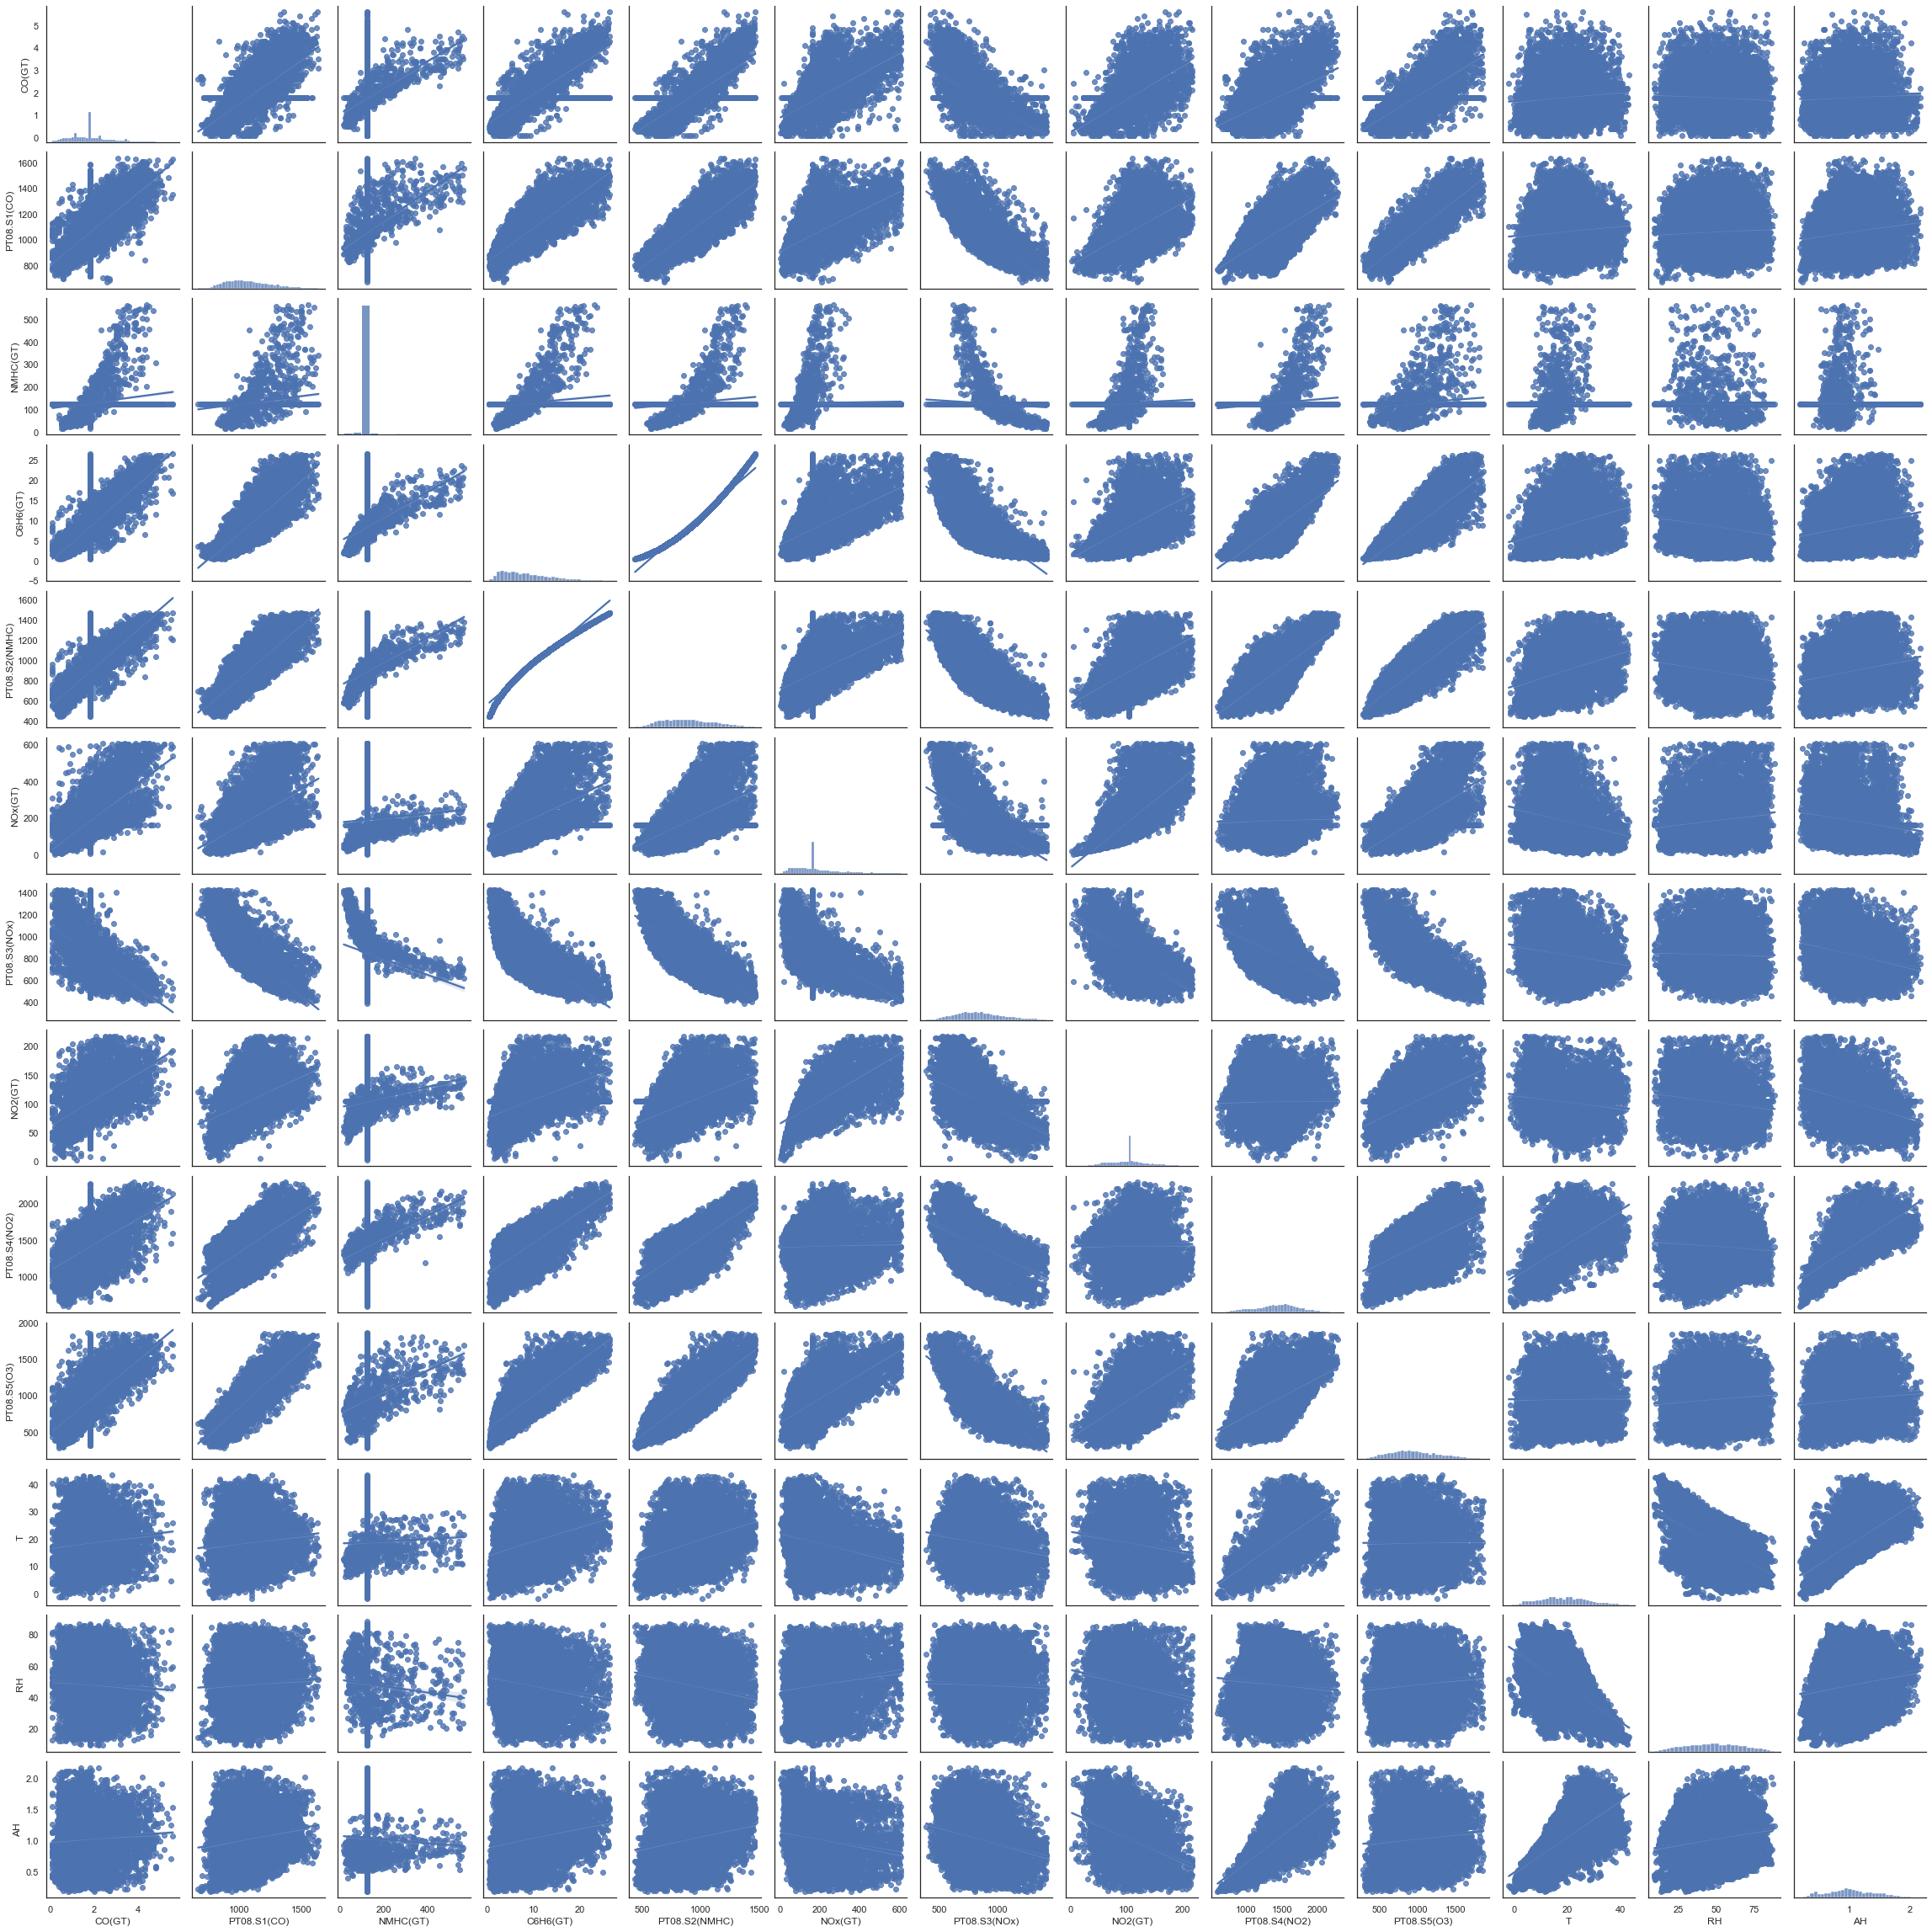

In [106]:
sns.pairplot(dfnum2, kind  ="reg")

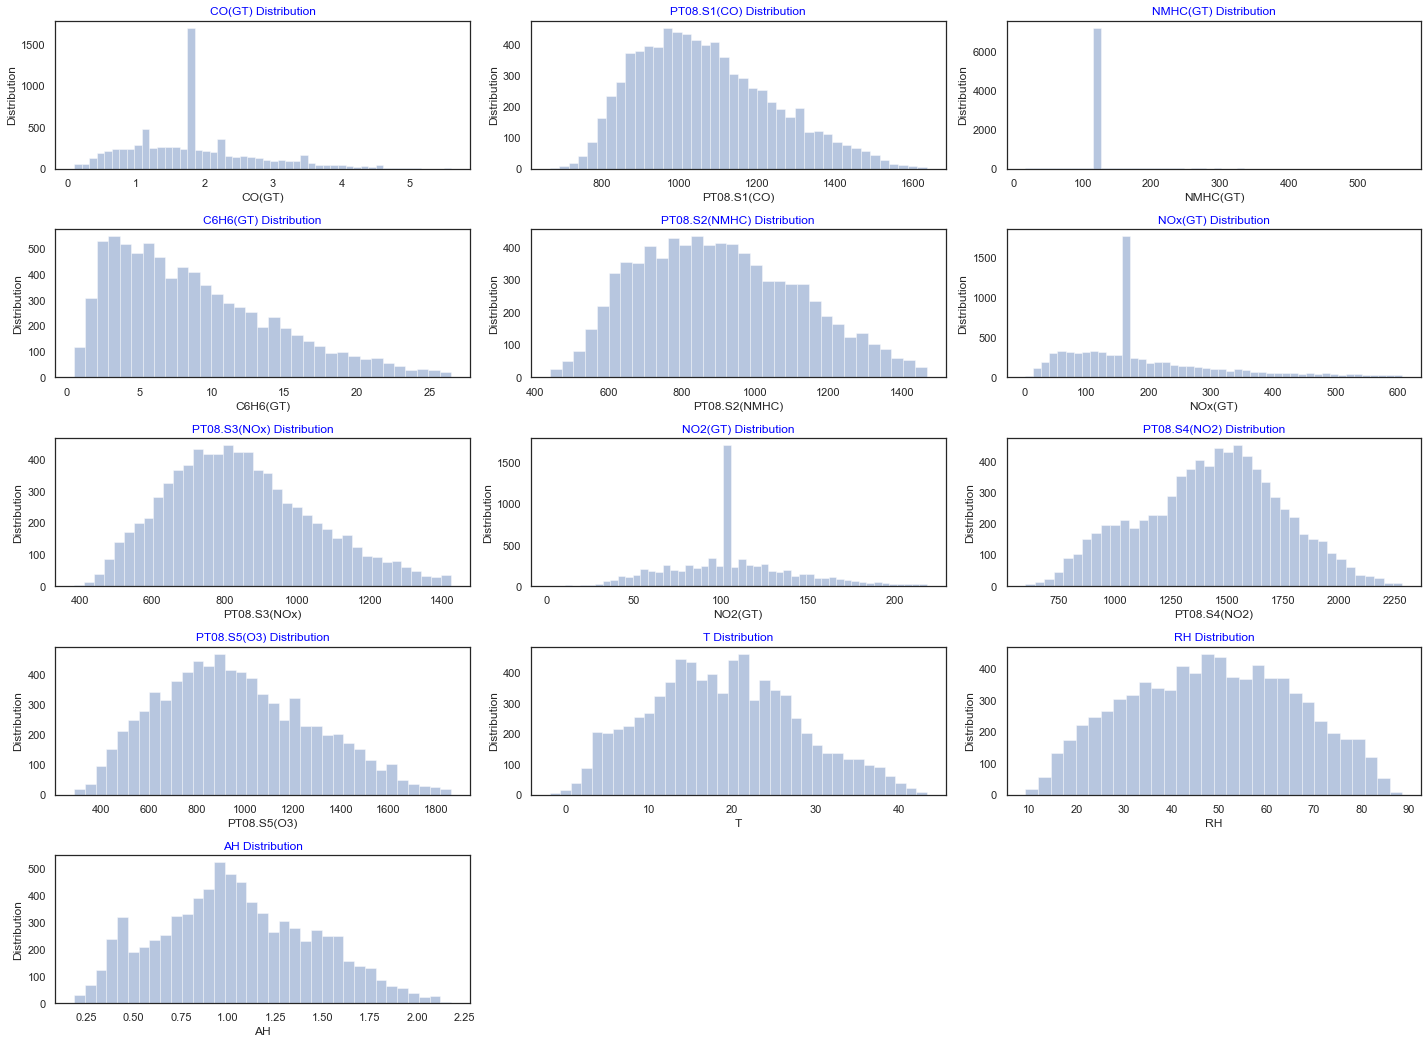

In [107]:
#I plotted the distrubition graphs
f=plt.figure(figsize=(20,20))
for i, col in enumerate(dfnum2.columns):
    ax=f.add_subplot(7,3,i+1)
    sns.distplot(dfnum2[col],kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

<AxesSubplot:>

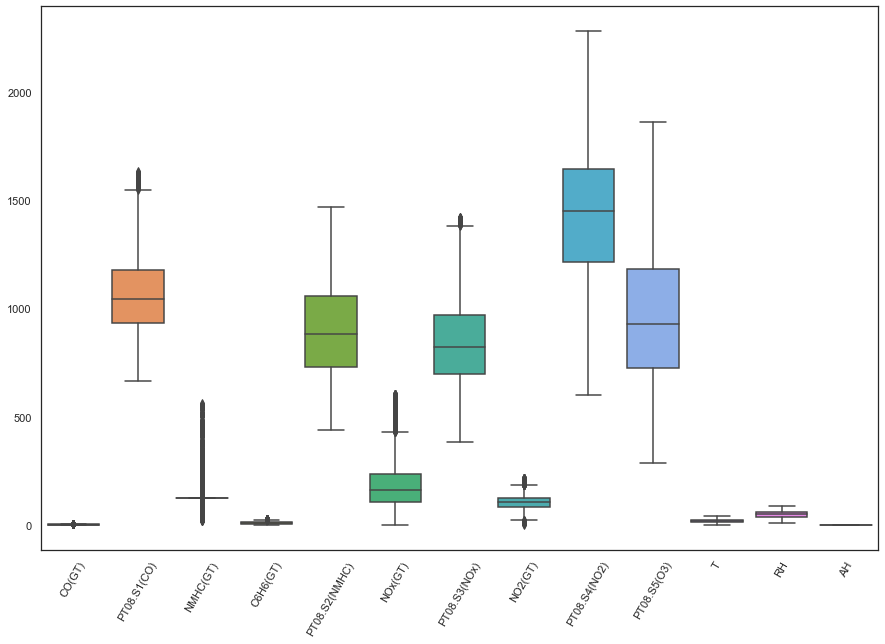

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=dfnum2, ax=ax)

In [109]:
data.isnull().sum() 

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Normalization: Min Max Scalar

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
MS = MinMaxScaler()
#The values of every feature in a data point can vary between random values. So, it is important to scale them so 
#that this matches specified rules.
MinMaxScaled = MS.fit_transform(dfnum2)
scaledData = pd.DataFrame(MinMaxScaled)

In [112]:
scaledData.columns = dfnum2.columns

In [113]:
scaledData #This is the scaled version of my data in case it needed.

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0     0.454545     0.715170  0.242701  0.438462       0.589494  0.271074   
1     0.345455     0.644995  0.173358  0.342308       0.500973  0.166942   
2     0.381818     0.758514  0.129562  0.326923       0.485409  0.213223   
3     0.381818     0.731682  0.114964  0.334615       0.494163  0.280992   
4     0.272727     0.624355  0.062044  0.230769       0.385214  0.213223   
...        ...          ...       ...       ...            ...       ...   
7883  0.545455     0.667699  0.196168  0.500000       0.642996  0.776860   
7884  0.418182     0.511868  0.196168  0.419231       0.571012  0.580165   
7885  0.418182     0.490196  0.196168  0.457692       0.606031  0.480992   
7886  0.363636     0.346749  0.196168  0.346154       0.506809  0.385124   
7887  0.381818     0.416925  0.196168  0.438462       0.590467  0.434711   

      PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0         0.645533  0.513889      0.648633     0.623013  0.342163  0.499371   
1         0.758886  0.416667      0.569560     0.434838  0.335541  0.484277   
2         0.726225  0.518519      0.567182     0.499682  0.304636  0.563522   
3         0.680115  0.555556      0.584423     0.581691  0.284768  0.638994   
4         0.788665  0.527778      0.528537     0.522568  0.289183  0.633962   
...            ...       ...           ...          ...       ...       ...   
7883      0.148895  0.870370      0.459572     0.916084  0.525386  0.252830   
7884      0.211335  0.819444      0.394174     0.623649  0.578366  0.182390   
7885      0.210375  0.800926      0.380499     0.511125  0.635762  0.114465   
7886      0.305476  0.712963      0.261593     0.306421  0.666667  0.054088   
7887      0.259366  0.768519      0.313912     0.335664  0.671082  0.049057   

            AH  
0     0.287139  
1     0.270955  
2     0.283331  
3     0.301618  
4     0.302670  
...        ...  
7883  0.286638  
7884  0.264141  
7885  0.228418  
7886  0.164938  
7887  0.159377  

[7888 rows x 13 columns]

# Data Reduction
Since data mining is a technique that is used to handle huge amounts of data; while working with a huge volume of data, analysis became harder in such cases. To get rid of this, we use the data reduction technique. It aims to increase storage efficiency and reduce data storage and analysis costs.

####  PCA

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [115]:
pca = PCA()
pca.fit(dfnum2)
PC_components = np.arange(pca.n_components_) + 1

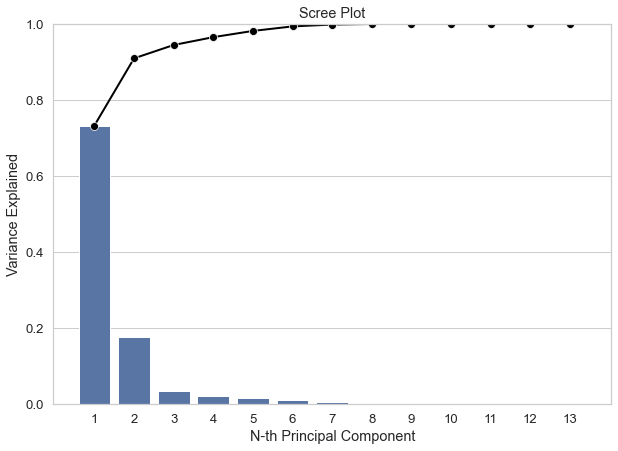

In [116]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()
#As you see after 7 feature relation, there is no change in data explainability.
#Which means we can use 7 feature to explain our data.

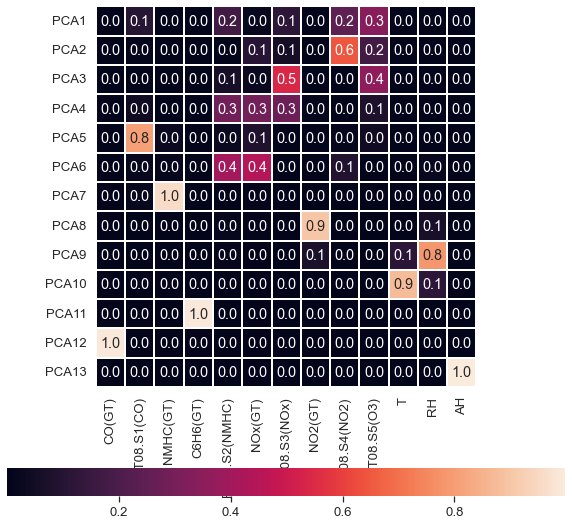

In [117]:
# Feature Weight
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(dfnum2.columns),
                 ax = ax,
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [118]:
#So, we can re-run the PCA model, but this time with the n_components=7 argument, which tells the PCA to keep only the top 
#7 principal components for us.

In [119]:
pca = PCA(n_components=7)

In [120]:
pca.fit(dfnum2)
PC_components = np.arange(pca.n_components_) + 1

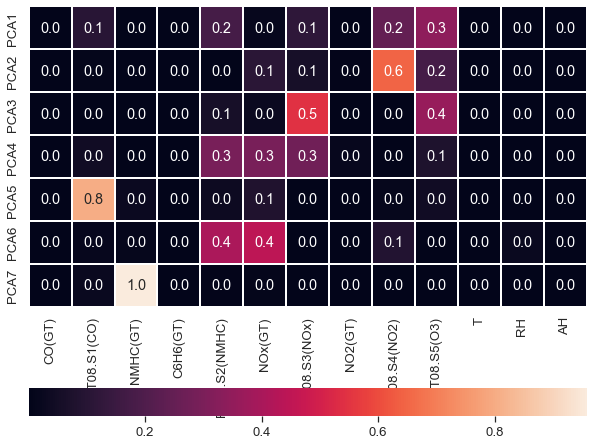

In [121]:
# Feature Weight
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(dfnum2.columns),
                 ax = ax,
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [122]:
#As you can see the heatmap above, PCA raws associate with 7 columns of data. It means that we can reduce the dimension of data
#to 7 columns which 'PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'

In [123]:
dfnum2.columns


Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [124]:
newdata=dfnum2.loc[:, ['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']]

In [125]:
newdata#here is the dimension reduced data

PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0          1360.0     150.0         1046.0    166.0        1056.0   
1          1292.0     112.0          955.0    103.0        1174.0   
2          1402.0      88.0          939.0    131.0        1140.0   
3          1376.0      80.0          948.0    172.0        1092.0   
4          1272.0      51.0          836.0    131.0        1205.0   
...           ...       ...            ...      ...           ...   
9352       1314.0     124.5         1101.0    472.0         539.0   
9353       1163.0     124.5         1027.0    353.0         604.0   
9354       1142.0     124.5         1063.0    293.0         603.0   
9355       1003.0     124.5          961.0    235.0         702.0   
9356       1071.0     124.5         1047.0    265.0         654.0   

      PT08.S4(NO2)  PT08.S5(O3)  
0           1692.0       1268.0  
1           1559.0        972.0  
2           1555.0       1074.0  
3           1584.0       1203.0  
4           1490.0       1110.0  
...            ...          ...  
9352        1374.0       1729.0  
9353        1264.0       1269.0  
9354        1241.0       1092.0  
9355        1041.0        770.0  
9356        1129.0        816.0  

[7888 rows x 7 columns]

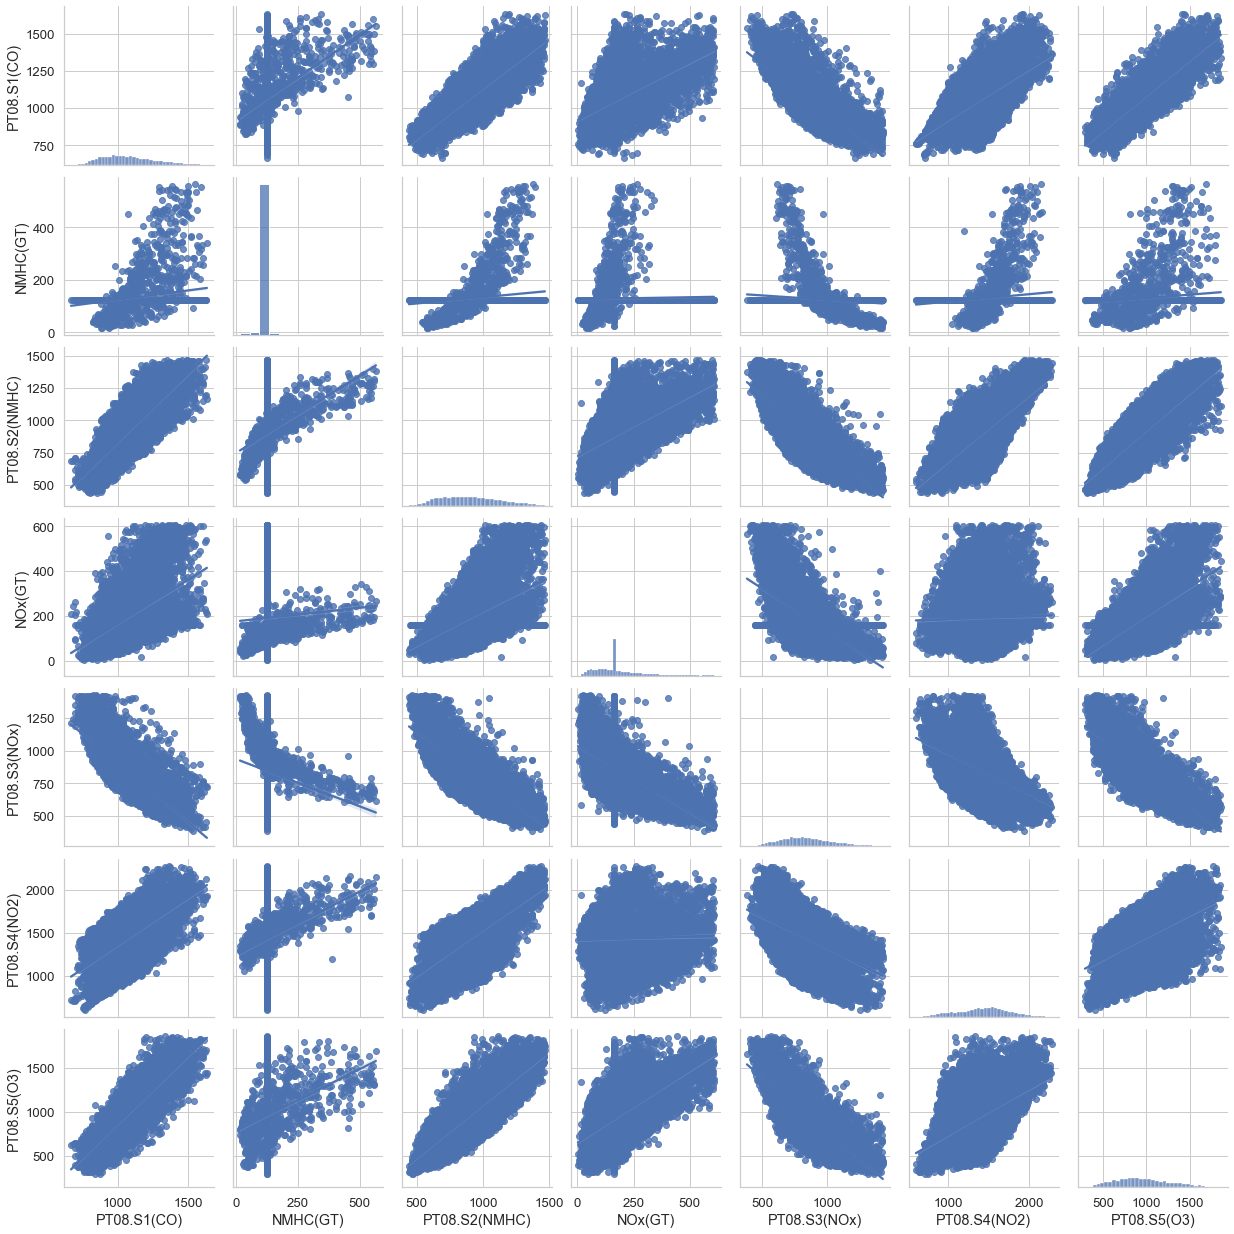

In [126]:
sns.pairplot(newdata, kind  ="reg");

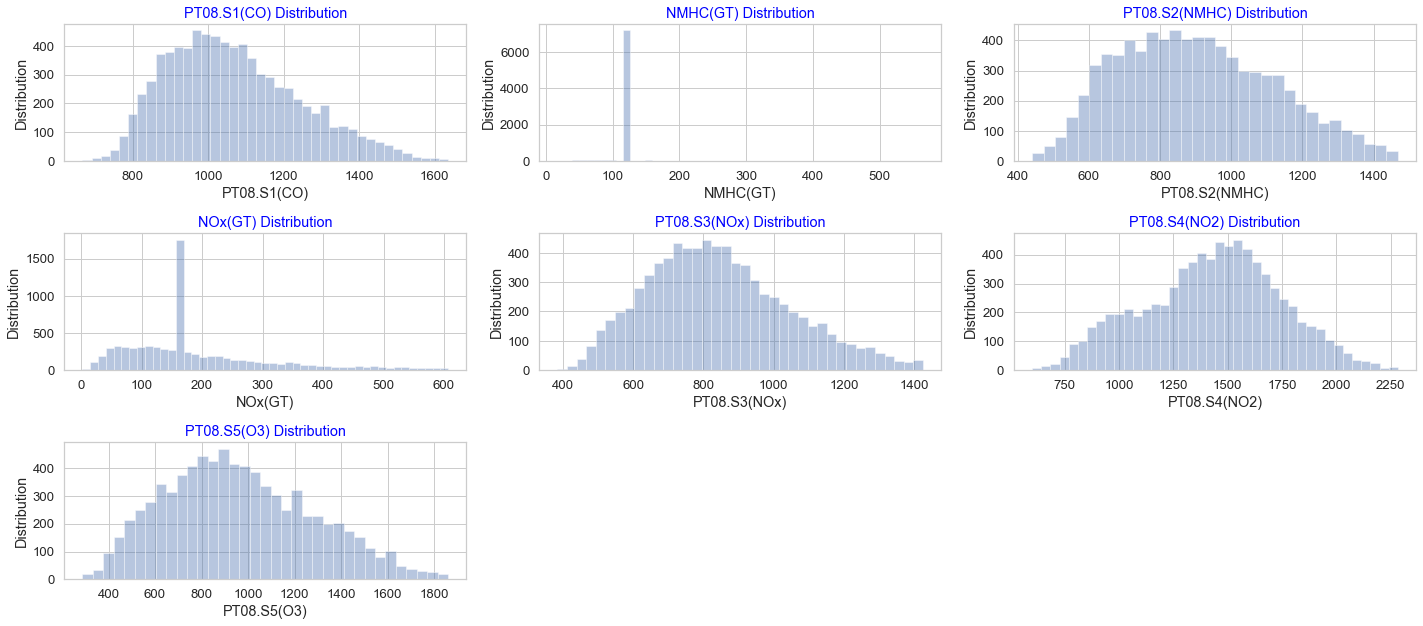

In [127]:
#I plotted the distrubition graphs last time.
f=plt.figure(figsize=(20,20))
for i, col in enumerate(newdata.columns):
    ax=f.add_subplot(7,3,i+1)
    sns.distplot(newdata[col],kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

<AxesSubplot:>

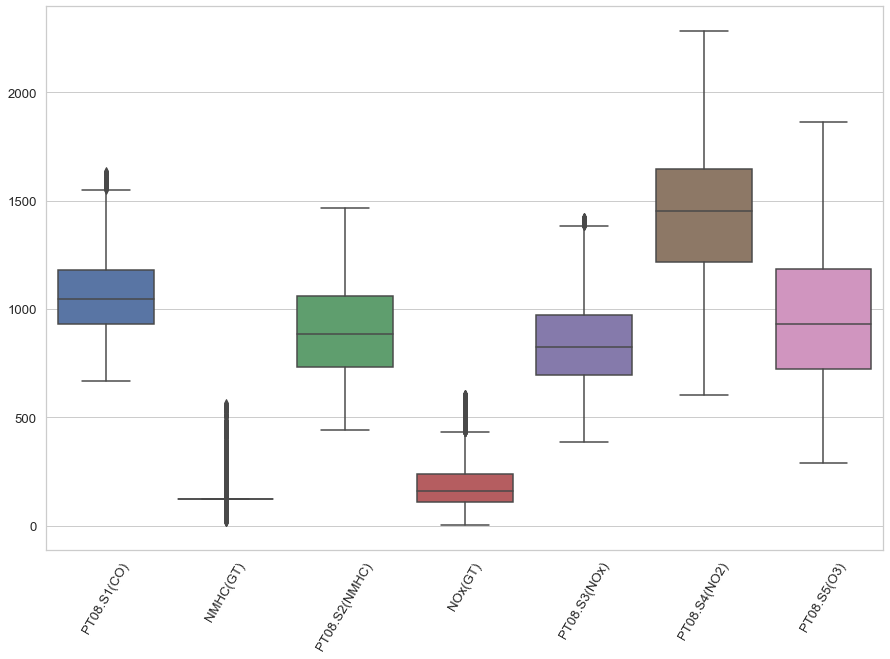

In [128]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=newdata, ax=ax)

In [129]:
#There is no such thing that outliers always bad :)

# Conclusion

What did I do so far? I step by step calculate the outliers of columns with IQR method. If outliers are too much, I ignore them with replacing them with NaN, I recalculate the outliers, drop them end replace again the NaN values with median of remaining values. If outliers are not too much, just dropped the row.There was columns that has too much innaccurate measurements like NHMC(GT) but I didn't drop that columns incase the measurements that not innacurate might be needed. Then, I normalized data with Min-Max Scaler and I did data reduction with PCA. I recreate my data with 7 columns instead of 13 columns (numeric ones).